## IBM Data Science Capstone Project - Seoul Districts

 This notebook contains the code for the Coursera Capstone Project on Data Science by IBM

In [8]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import csv

In [9]:
pd.set_option('max_colwidth', 800)

In [10]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_districts_of_Seoul').text 
soup = BeautifulSoup(source, 'lxml')

In [11]:
csv_file = open('seoul.csv', 'w')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['Districts'])

11

In [12]:
mwcg = soup.find_all(class_ = "wikitable")

length = len(mwcg) # Gets the length of number of `mw-category-groups` present

for i in range(1, length):  # Gets all the neighbourhoods
    lists = mwcg [i].find_all('a')
    for list in lists:
        nbd = list.get('title') # Gets the title of the neighbourhood
        csv_writer.writerow([nbd]) # Writes the name of the neighbourhood in the csv file

In [13]:
df = pd.read_csv('seoul.csv')

In [14]:
df.head()

,Districts
0,Dobong-gu
1,Dobong-dong
2,Banghak-dong
3,Ssangmun-dong
4,Chang-dong


In [27]:
print("Number of Districts: ", df.shape[0])

Number of Districts:  481


In [45]:
!conda install -c conda-forge gmaps 

Solving environment: \ ^C
failed

CondaError: KeyboardInterrupt



In [26]:

# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_1 = {
    'IAM_SERVICE_ID': '',
    'IBM_API_KEY_ID': '',
    'ENDPOINT': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.ng.bluemix.net/oidc/token',
    'BUCKET': 'ibmdatasciencecapstoneproject-donotdelete-pr-eseznm9gt7vfjc',
    'FILE': 'Geospatial_Coordinates.csv'
}


In [25]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_75c655ff8346446bbe1da3efa0e5ba47 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_75c655ff8346446bbe1da3efa0e5ba47.get_object(Bucket='ibmdatasciencecapstoneproject-donotdelete-pr-eseznm9gt7vfjc',Key='Geospatial_Coordinates.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,Postal Code,Latitude,Longitude
0,Dobong-gu,37.6688,127.0471
1,Dongdaemun-gu,37.5744,127.0400
2,Dongjak-gu,37.5124,126.9393
3,Eunpyeong-gu,37.6027,126.9291
4,Gangbuk-gu,37.6396,127.0257


In [48]:
print("Number of Districts with missing Longitude: ", df_data_1.Longitude.isna().sum())

Number of Districts with missing Longitude:  0


In [49]:
print("Number of hostels with missing Latitude: ", df_data_1.Latitude.isna().sum())

Number of hostels with missing Latitude:  0


### If there are missing Longitude and Latitude, we can proceed to remove them

In [57]:
df = df_data_1[df_data_1.Longitude.isna() == False]
df = df_data_1[df_data_1.Latitude.isna() == False]
df.shape

(26, 3)

### Let's do a final check to see if we have any missing data

In [30]:
df_data_1.count()

Postal Code    26
Latitude       26
Longitude      26
dtype: int64

### Now that we don't have missing data, we can check the data types of each

In [31]:
df_data_1.dtypes

Postal Code     object
Latitude       float64
Longitude      float64
dtype: object

### Using Foursquare to get the venues

In [ ]:
CLIENT_ID = '' 
CLIENT_SECRET = ''
VERSION = '20200126' 
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
LIMIT = 100
radius = 500

In [33]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [34]:
districts_venues = getNearbyVenues(names=df_data_1['Postal Code'],
                                   latitudes=df_data_1['Latitude'],
                                   longitudes=df_data_1['Longitude'])

Dobong-gu
Dongdaemun-gu
Dongjak-gu
Eunpyeong-gu
Gangbuk-gu
Gangdong-gu
Gangnam-gu
Gangseo-gu
Geumcheon-gu
Guro-gu
Gwanak-gu
Gwangjin-gu
Jongno-gu
Jung-gu
Jungnang-gu
Mapo-gu
Nowon-gu
Seocho-gu
Seodaemun-gu
Seongbuk-gu
Seongdong-gu
Songpa-gu
Yangcheon-gu
Yeongdeungpo-gu
Yongsan-gu
Seoul


In [ ]:
districts_venues.head()

In [ ]:
print('There are {} Distrticts.'.format(len(districts_venues['Venue Category'].unique())))

### Now we will perform One hot encoding. It is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

In [ ]:
districts_onehot = pd.get_dummies(districts_venues[['Venue Category']], prefix="", prefix_sep="")
districts_onehot.head()

In [ ]:
districts_grouped = districts_onehot.groupby('Aquarium').mean().reset_index()

### Import additional Libraries

In [ ]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [ ]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [ ]:
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium

print('Libraries imported.')

### Performing Clusters

In [46]:
kclusters = 2
grouped_clustering = districts_grouped.drop('Aquarium', 1)
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)
kmeans.labels_[0:100]

array([0, 1], dtype=int32)

In [52]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Aquarium']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Aquarium'] = districts_grouped['Aquarium']

for ind in np.arange(districts_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(districts_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Aquarium,1st Common Venue,2nd Common Venue,3rd Common Venue,4th Common Venue,5th Common Venue,6th Common Venue,7th Common Venue,8th Common Venue,9th Common Venue,10th Common Venue
0,0,Korean Restaurant,Coffee Shop,Café,Bakery,BBQ Joint,Chinese Restaurant,Japanese Restaurant,Hotel,Ice Cream Shop,Seafood Restaurant
1,1,Wine Bar,Fish Market,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Department Store,Dessert Shop,Dive Bar,Dog Run


In [53]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [67]:
from sklearn.cluster import KMeans  
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=15, random_state=8)  
X = districts_onehot.drop(['Aquarium'], axis=1)
X.head()

,American Restaurant,Arcade,Art Gallery,Art Museum,Asian Restaurant,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bar,...,Tourist Information Center,Trail,Udon Restaurant,Used Bookstore,Veterinarian,Vietnamese Restaurant,Warehouse Store,Waterfall,Whisky Bar,Wine Bar
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Generating a map to visualize the districts and how they cluster together.

In [69]:
kmeans.fit(X)
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int32)

In [71]:
def get_inertia(n_clusters):
    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=15, random_state=8)
    km.fit(X)
    return km.inertia_

Text(0, 0.5, 'Error')

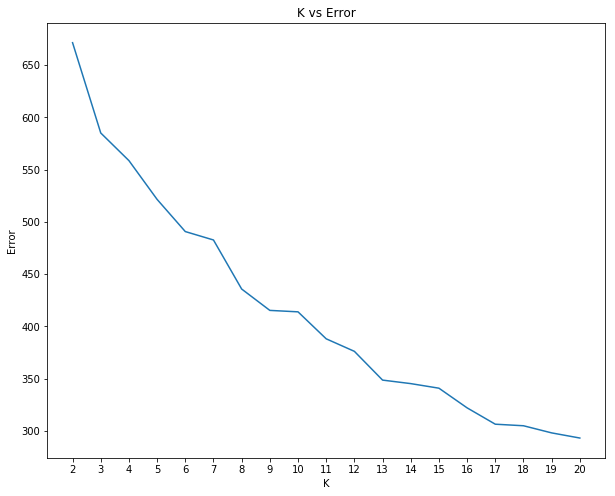

In [78]:
# import matplotlib.pyplot as plt
import seaborn as sns
scores = [get_inertia(x) for x in range(2, 21)]
plt.figure(figsize=[10, 8])
sns.lineplot(x=range(2, 21), y=scores)
plt.title("K vs Error")
plt.xticks(range(2, 21))
plt.xlabel("K")
plt.ylabel("Error")

From the above vizual, we can see that the error reduces starting from K=6